In [2]:
import numpy.typing as npt
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import torch
from sklearn.manifold import TSNE


from src import model_trajectories as mt
from src import utils

In [330]:
all_preds = utils.load_3d_array('valid_preds/unet_alt', (3,100,16384))
all_preds.shape #(epoch, image, pixels) -> (3, 100, 16384)

(3, 100, 16384)

In [335]:
# after t-sne: 3*100*2

In [336]:
X = all_preds[0]
Y = all_preds[1]
Z = all_preds[2]
X.shape, Y.shape, Z.shape

((100, 16384), (100, 16384), (100, 16384))

In [324]:
tsne = TSNE(n_components=2)
X_transformed = tsne.fit_transform(X)
Y_transformed = tsne.fit_transform(Y)
Z_transformed = tsne.fit_transform(Z)

/mnt/c/Users/johan/itu/aml/AML4DS2022/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/mnt/c/Users/johan/itu/aml/AML4DS2022/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/mnt/c/Users/johan/itu/aml/AML4DS2022/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/mnt/c/Users/johan/itu/aml/AML4DS2022/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/mnt/c/Users/johan/itu/aml/AML4DS2022/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE w

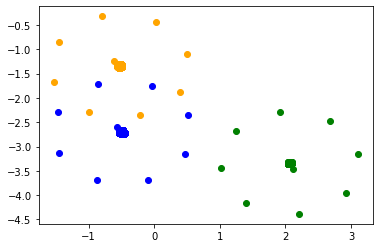

In [325]:
plt.scatter(X_transformed[:, 0], X_transformed[:,1], c="b")
plt.scatter(Y_transformed[:, 0], Y_transformed[:,1], c="orange")
plt.scatter(Z_transformed[:, 0], Z_transformed[:,1], c="g")

In [56]:
def visualize_model_trajectories(m1_preds:npt.NDArray, m2_preds:npt.NDArray):
    tsne = TSNE(n_components=2, init="random", random_state=42)
    cmap = viridis = matplotlib.cm.get_cmap('viridis', 30)
    
    fig = plt.figure(figsize=(30,30))

    for epoch, (preds1, preds2) in enumerate(zip(m1_preds, m2_preds)):
        
        m1_epoch_trajectory = tsne.fit_transform(preds1)
        m2_epoch_trajectory = tsne.fit_transform(preds2)
            
        plt.scatter(m1_epoch_trajectory[:, 0], m1_epoch_trajectory[:, 1], c=cmap(epoch), marker="^")
        plt.scatter(m2_epoch_trajectory[:, 0], m2_epoch_trajectory[:, 1], c=cmap(epoch), marker="x")

    plt.show()

In [22]:
#all_preds = utils.load_3d_array('valid_preds/unet_alt_lr0.00001.txt', (30,100,16384))
all_preds2 = utils.load_3d_array('valid_preds/unet_alt_30ep_lr0.00001.txt', (30,100,16384))

/mnt/c/Users/johan/itu/aml/AML4DS2022/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/mnt/c/Users/johan/itu/aml/AML4DS2022/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend 

/mnt/c/Users/johan/itu/aml/AML4DS2022/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/mnt/c/Users/johan/itu/aml/AML4DS2022/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend 

/mnt/c/Users/johan/itu/aml/AML4DS2022/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/mnt/c/Users/johan/itu/aml/AML4DS2022/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend 

/mnt/c/Users/johan/itu/aml/AML4DS2022/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/mnt/c/Users/johan/itu/aml/AML4DS2022/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend 

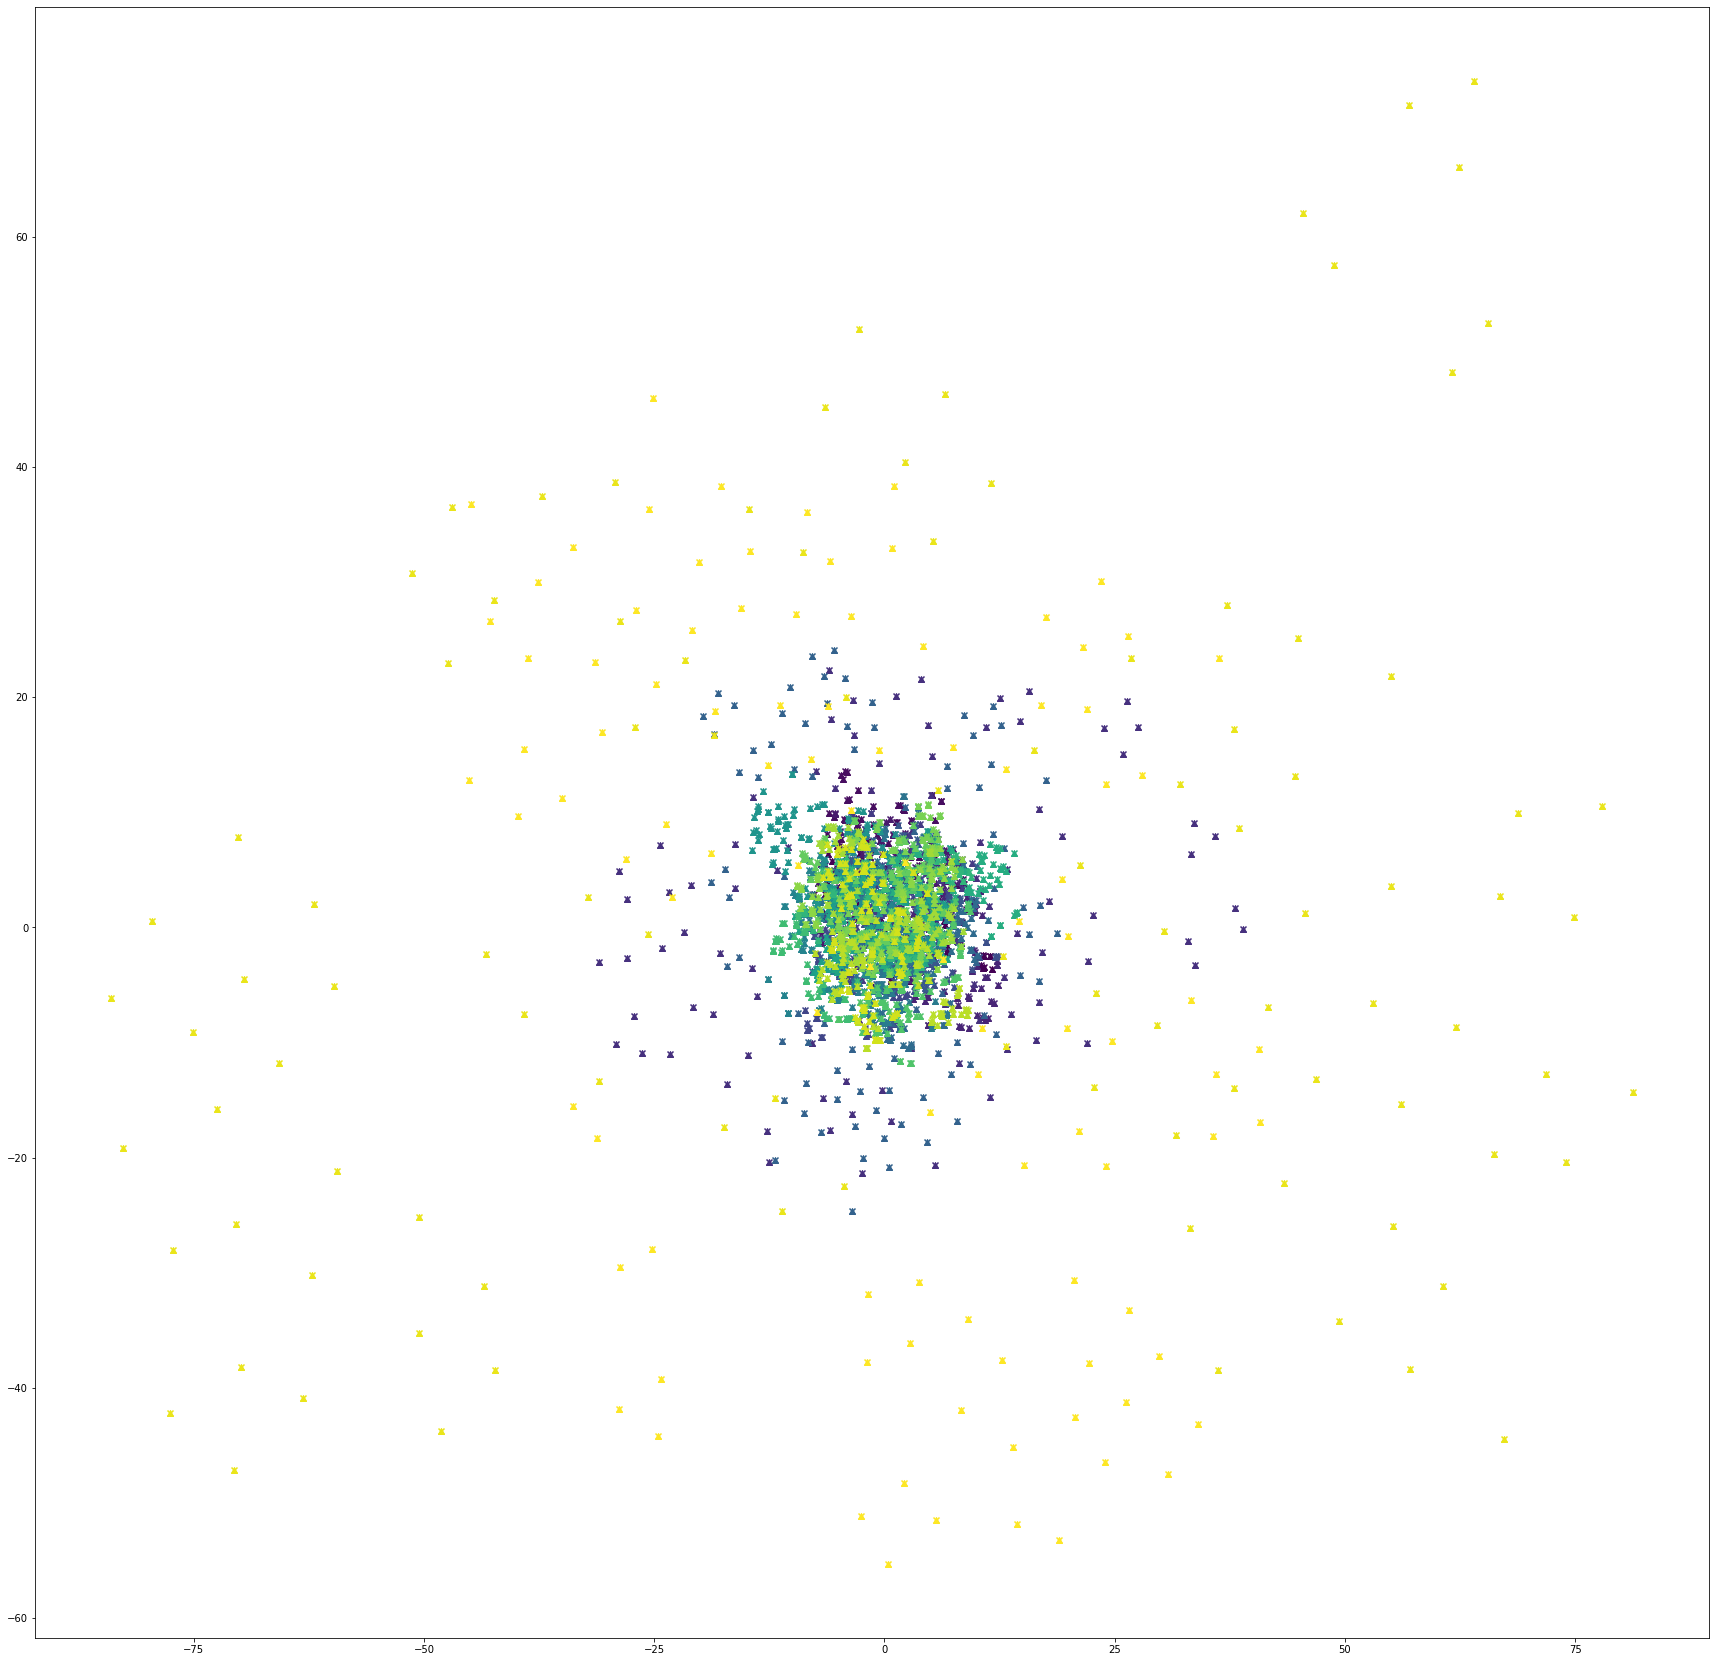

In [57]:
visualize_model_trajectories(all_preds2, all_preds2)

In [246]:
# en graf sammenligner to modeller på pixels prediction niveau over epochs
#predictions på et billede -> reduction med t-sne? for hver epoch?
# så ledes 100 billeder, hvert billede # of epochs representationer af billedet, 2 representationer af dette, en for hver model
#
# så for 3 epochs med 1 og to modeller får vi 3 * 2 punkter = 6 punkter

In [ ]:
# ved at lave en vector af images x 2 hvor 2 kommer fra t-sne reduction, kan vi følge et image over epochs. 
#Altså (epochs, images, t-sne dim)
#så kan man vælge at plotte to modellers predictions på bestemte billeder over epochs.

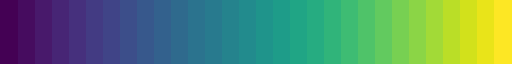

In [55]:
viridis = matplotlib.cm.get_cmap('viridis', 30)
viridis